# Partie II: Données de prêt de Prosper

**Présenté par Aby DIOUF**

Cet ensemble de données contient 113 937 prêts avec 81 variables sur chaque prêt, y compris le montant du prêt, le taux de l'emprunteur (ou taux d'intérêt), le statut actuel du prêt, le revenu de l'emprunteur, et bien d'autres.

Nous ne sommes pas censé explorer toutes les variables de l'ensemble de données ! 
Nous allons concentrer notre explorartion sur le dataset **prosper_data_clean.csv**  qui contient 83520 lignes et 15 variables sur chaque prêt.

## Effets des variables sur les prêts de Prosper

### Vue d'ensemble du jeu de données

Les données étaient constituées du montant initial des emprunts (**LoanOriginalAmount**), du rendement du prêteur sur le prêt(**LenderYield**), du taux d'intérêt de l'emprunteur sur un emprunt (**BorrowerRate**), Le taux annuel effectif global (TAEG) de l'emprunteur pour le prêt (**BorrowerAPR**) et d'autres attributs d'environs $83520$ prêts. Les autres attributs comprenaient le status de l'emploi des emprunteurs (**EmploymentStatus**), le status du prêt (**LoanStatus**), la profession des emprunteurs (**Occupation**) etc.


## importation des modules

In [2]:
# Importation des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pour ignorer les warnings
import warnings
warnings.simplefilter("ignore")

## Chargement de l'ensembles des données

In [3]:
# load dataset to pandas DataFrame
df_prosper = pd.read_csv('prosper_data_clean.csv')
df_prosper.head(10)

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,Investors,ProsperScore,LoanStatus,BorrowerState,EmploymentStatus,ProsperRating (Alpha),Occupation,LoanOriginationDate,LoanNumber,LoanOriginalAmount
0,1209647,36,0.12016,0.0920,0.0820,1,7.0,Current,CO,Employed,A,Professional,2014-03-03 00:00:00,134815,10000
1,658116,36,0.12528,0.0974,0.0874,158,9.0,Current,GA,Employed,A,Skilled Labor,2012-11-01 00:00:00,77296,10000
2,909464,36,0.24614,0.2085,0.1985,20,4.0,Current,MN,Employed,D,Executive,2013-09-20 00:00:00,102670,15000
3,1074836,60,0.15425,0.1314,0.1214,1,10.0,Current,NM,Employed,B,Professional,2013-12-24 00:00:00,123257,15000
4,750899,36,0.31032,0.2712,0.2612,1,2.0,Current,KS,Employed,E,Sales - Retail,2013-04-18 00:00:00,88353,3000
5,768193,36,0.23939,0.2019,0.1919,1,4.0,Current,CA,Employed,C,Laborer,2013-05-13 00:00:00,90051,10000
6,1023355,36,0.07620,0.0629,0.0529,1,9.0,Current,IL,Employed,AA,Food Service,2013-12-12 00:00:00,121268,10000
7,1023355,36,0.07620,0.0629,0.0529,1,11.0,Current,IL,Employed,AA,Food Service,2013-12-12 00:00:00,121268,10000
8,587746,60,0.27462,0.2489,0.2389,19,7.0,Current,MD,Employed,C,Fireman,2012-05-17 00:00:00,65946,13500
9,1081604,36,0.17969,0.1435,0.1335,1,4.0,Past Due (1-15 days),AL,Employed,B,Sales - Retail,2014-01-07 00:00:00,125045,4000


## Séparation des variables numériques et des variables catégorielles

In [4]:
# convertir les variables EmploymentStatus, Occupation,LoanStatus, 
#ProsperRating (Alpha) et BorrowerState en type category 
df_prosper[['LoanStatus','BorrowerState','EmploymentStatus',
            'ProsperRating (Alpha)','Occupation']] = df_prosper[['LoanStatus','BorrowerState',
            'EmploymentStatus','ProsperRating (Alpha)','Occupation']].astype('category')
categoric_vars = df_prosper[['LoanStatus','BorrowerState','EmploymentStatus','ProsperRating (Alpha)','Occupation']]

In [5]:
print('Variables categorielles \n')
categoric_vars

Variables categorielles 



,LoanStatus,BorrowerState,EmploymentStatus,ProsperRating (Alpha),Occupation
0,Current,CO,Employed,A,Professional
1,Current,GA,Employed,A,Skilled Labor
2,Current,MN,Employed,D,Executive
3,Current,NM,Employed,B,Professional
4,Current,KS,Employed,E,Sales - Retail
...,...,...,...,...,...
83515,Current,IL,Employed,C,Food Service Management
83516,FinalPaymentInProgress,PA,Employed,A,Professional
83517,Current,TX,Employed,D,Other
83518,Completed,GA,Full-time,C,Food Service


In [7]:
# variables numériques
var_numeric = df_prosper[['BorrowerAPR','BorrowerRate','LenderYield','LoanOriginalAmount']]

In [8]:
print("Variables numerique \n")
var_numeric

Variables numerique 



,BorrowerAPR,BorrowerRate,LenderYield,LoanOriginalAmount
0,0.12016,0.0920,0.0820,10000
1,0.12528,0.0974,0.0874,10000
2,0.24614,0.2085,0.1985,15000
3,0.15425,0.1314,0.1214,15000
4,0.31032,0.2712,0.2612,3000
...,...,...,...,...
83515,0.22354,0.1864,0.1764,10000
83516,0.13220,0.1110,0.1010,2000
83517,0.23984,0.2150,0.2050,10000
83518,0.28408,0.2605,0.2505,15000


## Distribution du montant des prêts

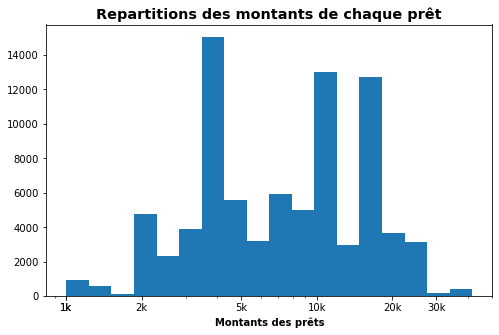

In [9]:
log_binsize = 0.09
bins =10 ** np.arange(3.0,np.log10(df_prosper['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8,5])
plt.hist(data= df_prosper, x = 'LoanOriginalAmount', bins = bins )
plt.xscale('log')
plt.xticks([1000, 1e3, 2e3, 5e3, 1e4, 2e4,3e4], [1000,'1k', '2k', '5k', '10k', '20k','30k'])
plt.xlabel('Montants des prêts',fontweight = "bold")
plt.title('Repartitions des montants de chaque prêt',fontweight = "bold", fontsize = 'x-large')
plt.show()

## Distributions du rendement du prêteur sur le prêt

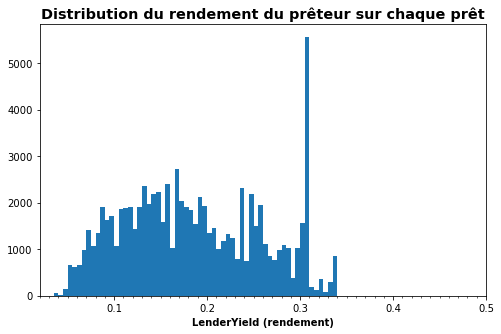

In [10]:
binsize = 0.005
bins = np.arange(0.02, 0.5 + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_prosper, x = 'LenderYield', bins = bins)
plt.title('Distribution du rendement du prêteur sur chaque prêt',fontweight = 'bold',fontsize='x-large')
plt.xlim([0.02,0.5])
plt.xlabel('LenderYield (rendement)',fontweight = 'bold')
plt.gca().set_xticks(np.arange(0.02,0.5, 0.01), minor = True)
plt.show()

## Distrubution du taux d'intérêt de l'emprunteurs sur le prét

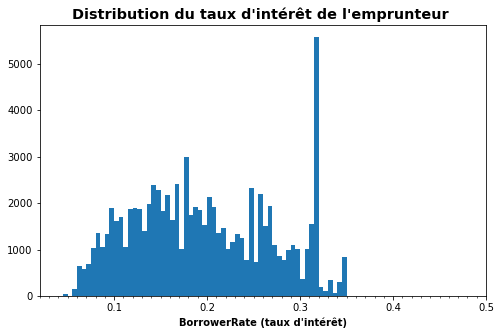

In [11]:
binsize = 0.005
bins = np.arange(0.02, 0.5 + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_prosper, x = 'BorrowerRate', bins = bins)
plt.title("Distribution du taux d'intérêt de l'emprunteur ",fontweight = 'bold',fontsize='x-large')
plt.xlim([0.02,0.5])
plt.xlabel("BorrowerRate (taux d'intérêt)",fontweight = 'bold')
plt.gca().set_xticks(np.arange(0.02,0.5, 0.01), minor = True)
plt.show()

## Distribution du taux annuel effectif global (TAEG) de l'emprunteur pour le prêt.


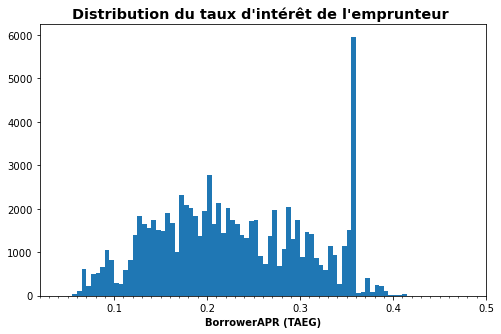

In [12]:
# histogramme avec hist() de matplotlib
binsize = 0.005
bins = np.arange(0.02, 0.5 + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_prosper, x = 'BorrowerAPR', bins = bins)
plt.title("Distribution du taux d'intérêt de l'emprunteur ",fontweight = 'bold',fontsize='x-large')
plt.xlim([0.02,0.5])
plt.xlabel("BorrowerAPR (TAEG)",fontweight = 'bold')
plt.gca().set_xticks(np.arange(0.02,0.5, 0.01), minor = True)
plt.show()

Ces Visualisation montre parfaitement que le rendement du prêteur sur le prêt (**LenderYield**), le taux d'intérêt de l'emprunteur sur le prêt (**BorrowerRate**) et le taux annuel effectif global (TAEG) de l'emprunteur pour le prêt (**BorrowerAPR**) sont proportionnelle. Donc nous allons explorer une seule de ces trois variables en fonction du montant des prêts.


## Distribution du rendement du prêteur sur le prêt en fonction du montant de chaque prêt.

En reportant le montant sur une echelle logaritmique et en prenant la racine cubique du rendement qui proportionnelle aux taux d'intérêt de l'emprunteur et au taux annuel effectif global TAEG de l'emprunteur sur le prêt, on obtient une relation parfaitement linéaire.

In [13]:
# Racine cubique
def cuberoot_trans(x, inverse = False):
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

df_prosper['rendement'] = df_prosper['LenderYield'].apply(cuberoot_trans)

In [14]:
# logarithme sur le montant
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_prosper['montant'] = df_prosper['LoanOriginalAmount'].apply(log_trans)

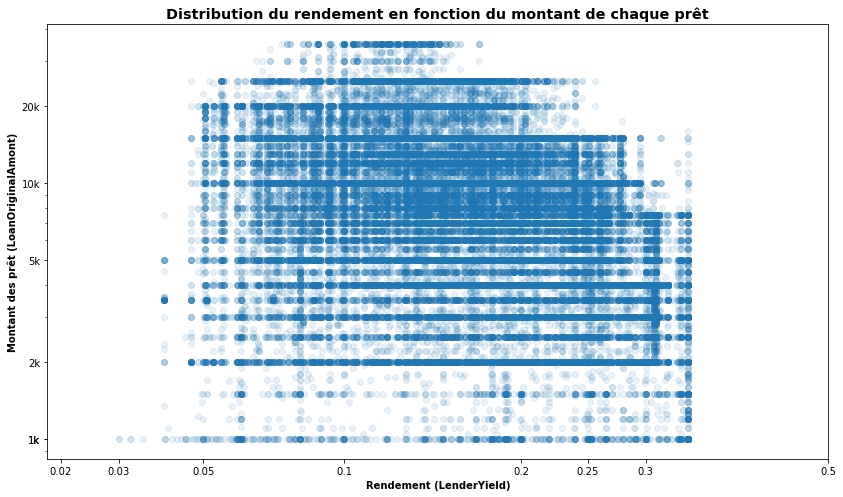

In [15]:
# Nuage de point
plt.figure(figsize = [14, 8])
plt.scatter(data = df_prosper, x = 'rendement', y = 'LoanOriginalAmount', alpha =0.1)
prosper_ticks = [0.02, 0.03, 0.05, 0.1, 0.2, 0.25, 0.3, 0.5]
plt.xticks(cuberoot_trans(np.array(prosper_ticks)), prosper_ticks)
plt.xlim([cuberoot_trans(.018), cuberoot_trans(0.5)])

plt.yscale('log')
plt.yticks([1000, 1e3, 2e3, 5e3, 1e4, 2e4], [1000, '1k', '2k', '5k', '10k', '20k'])

#plt.xlim([0, 0.5])
plt.xlabel('Rendement (LenderYield)', fontweight = 'bold')
plt.ylabel('Montant des prêt (LoanOriginalAmont)',fontweight = 'bold')
plt.title("Distribution du rendement en fonction du montant de chaque prêt",fontweight='bold',fontsize ='x-large' )
plt.show()

## Montant et rendement des prêts selon le status du prêt (LoanStatus): 

Il existe une effet interactive visible entre le montant initiale de chaque prêt, le rendement du prêteur sur le prêt et les variables catégorielles comme le status du prêt LoanStatus.

In [16]:
# assist function for plotting 
def catqual_by_pc(var, color):
    fig, ax = plt.subplots(nrows =2, figsize = [8,10])
    sns.violinplot(data = df_prosper, y = var, x = 'montant', ax = ax[0],
                  color = color)
    ax[0].set_xticks(log_trans(np.array([1000, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[0].set_xticklabels([1000, '1k', '2k', '5k', '10k', '20k'])
    ax[0].set_xlabel("Montant")
    ax[0].set_ylabel(var.capitalize())
    
    sns.violinplot(data = df_prosper, y = var, x = 'rendement', ax = ax[1],color = color)
    ax[1].set_xticks(cuberoot_trans(np.array(prosper_ticks)))
    ax[1].set_xticklabels(prosper_ticks)
    ax[1].set_xlim(cuberoot_trans(np.array([0.02, 0.5])))
    ax[1].set_xlabel("Rendement")
    ax[1].set_ylabel(var.capitalize())
    
    
    fig.suptitle('Montant et rendement de prêt par  {}'.format(var.capitalize()), fontweight ='bold', fontsize = 'x-large')
    plt.show()

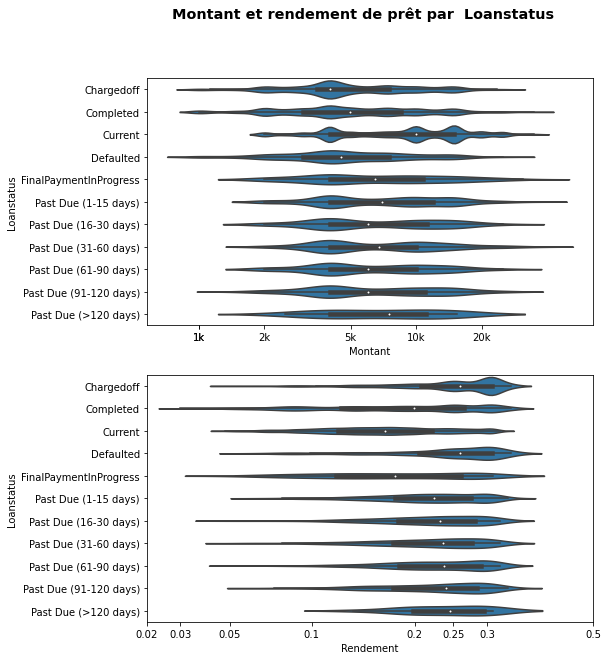

In [17]:
# Diagramme de violon
catqual_by_pc('LoanStatus', sns.color_palette()[0])

## Montant en fonction de la profession et du status de l'emploi de l'emprunteur

Nous pouvons voir comment la profession des emprunteurs et leurs status de travail peut affecter les prêts des données de prêt de Prosperen traçant le montant moyens sur le rendement.

In [18]:
prosper_rend = (df_prosper['LenderYield'] >= 0.30) & (df_prosper['LenderYield'] <= 0.34)
prosper_rend_1c = df_prosper.loc[prosper_rend,:]

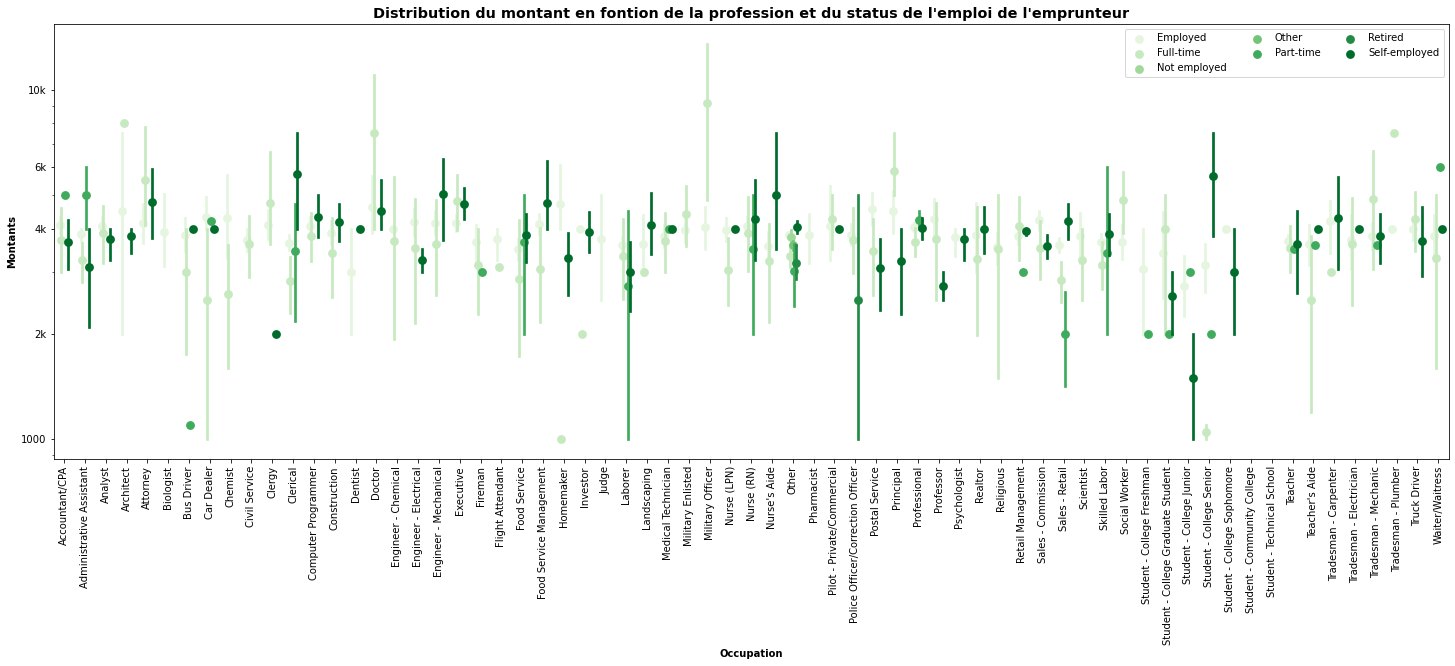

In [19]:
fig = plt.figure(figsize = [25,8])
ax = sns.pointplot(data = prosper_rend_1c, x = 'Occupation', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.ylabel('Montants',fontweight = 'bold')
plt.xlabel('Occupation',fontweight ='bold')
plt.title("Distribution du montant en fontion de la profession et du status de l'emploi de l'emprunteur",
          fontweight ='bold',fontsize = 'x-large')
plt.yscale('log')
plt.yticks([1000,2e3, 4e3, 6e3, 1e4], [1000,'2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation= 90)
plt.legend(ncol=3)
plt.show();

>

# Conclusion

Au cours de l'exploration, j'ai constaté qu'il existait une forte relation entre le rendement du prêteur, le taux d'intérêt de l'emprunteur, le taux annuel effectif global des prêts et le montant des prêts. Cette relation est approximativement linéaire lorsque le montant est transformé en une échelle logarithmique et que le rendement à l'échelle de la racine cubique. Cependant, la profession des emprunteurs et le status de l'emploi de l'emprunteur Ont  aussi un impacte sur les préts et le rendement du prêteur.En plus le status des prêt à une relation claire avec le taux d'interêt des emprunteur.

En dehors des principales variables d'intérêt, j'ai vérifié la relation entre le classement de prosper attribué à chaque prêt et l'addresse des emprunteurs. Pour l'ensemble de données donné, il y avait une interaction intéressante dans les caractéristiques catégoriques des prêt. Les prêt de plus faible montant semblaient avoir une distribution du rendement et du status de l'emploi de l'emprunteur légèrement moyen important.

In [ ]:
!jupyter nbconvert prosper_loan_data_part2.ipynb --to slides --post serve --no-input --no-prompt